***We will first determine the type of objects required and then call the required scripts.***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

***then we read the file***

In [2]:
sample_submission = pd.read_csv('/kaggle/input/czii-cryo-et-object-identification/sample_submission.csv')

In [3]:
sample_submission.head()

,id,experiment,particle_type,x,y,z
0,0,TS_5_4,beta-amylase,2983.596,3154.13,764.124
1,1,TS_5_4,beta-amylase,2983.596,3154.13,764.124
2,2,TS_5_4,beta-galactosidase,2983.596,3154.13,764.124
3,3,TS_6_4,ribosome,2983.596,3154.13,764.124
4,4,TS_6_4,ribosome,2983.596,3154.13,764.124


In [4]:
sample_submission.tail()

,id,experiment,particle_type,x,y,z
5,5,TS_6_4,ribosome,2983.596,3154.13,764.124
6,6,TS_69_2,apo-ferritin,2983.596,3154.13,764.124
7,7,TS_69_2,beta-galactosidase,2983.596,3154.13,764.124
8,8,TS_69_2,ribosome,2983.596,3154.13,764.124
9,9,TS_69_2,virus-like-particle,2983.596,3154.13,764.124


***we aslo delete the columns which is not light***

In [5]:
sample_new = sample_submission.drop(['id','experiment','x','y','z'],axis=1)

In [6]:
sample_new.head()

,particle_type
0,beta-amylase
1,beta-amylase
2,beta-galactosidase
3,ribosome
4,ribosome


***We know the level of definition of objects such as  Beta-amylase (impossible, not listed)

Beta-galactosidase (difficult)

Ribosome (easy)

Thyroglobulin (difficult)

Virus-like particle (easy)

apo-ferritin(easy)

We will make the easy level 1, the difficult level 2, and the undefined level 0***

In [7]:
Selection_level = []
for i in range(len(sample_new)):
    if sample_new.iloc[i]['particle_type'] == 'beta-amylase':
        Selection_level.append ('0')
    elif sample_new.iloc[i]['particle_type'] == 'beta-galactosidase':
        Selection_level.append ('2')
    elif sample_new.iloc[i]['particle_type'] == 'ribosome' or sample_new.iloc[i]['particle_type'] == 'apo-ferritin' or sample_new.iloc[i]['particle_type'] == 'virus-like-particle':
        Selection_level.append ('1')
sample_new['Selection_level'] = Selection_level


In [8]:
sample_new.head()

,particle_type,Selection_level
0,beta-amylase,0
1,beta-amylase,0
2,beta-galactosidase,2
3,ribosome,1
4,ribosome,1


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'beta-amylase'),
  Text(1, 0, 'beta-galactosidase'),
  Text(2, 0, 'ribosome'),
  Text(3, 0, 'apo-ferritin'),
  Text(4, 0, 'virus-like-particle')])

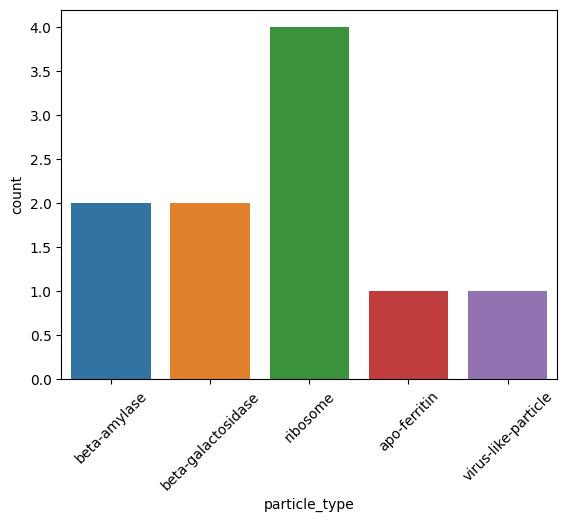

In [9]:
sns.countplot(x='particle_type', data=sample_new)
plt.xticks(rotation=45)

In [10]:
selection= pd.get_dummies(sample_new, prefix=['particle_type'], columns=['particle_type'])
x = selection.drop(['Selection_level'], axis=1)
y = selection['Selection_level']
y = y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [11]:
selection.head()

,Selection_level,particle_type_apo-ferritin,particle_type_beta-amylase,particle_type_beta-galactosidase,particle_type_ribosome,particle_type_virus-like-particle
0,0,False,True,False,False,False
1,0,False,True,False,False,False
2,2,False,False,True,False,False
3,1,False,False,False,True,False
4,1,False,False,False,True,False


***Finally, we build a model using two libraries, LogisticRegression and , SVC and determine the level of Training and test in both libraries***

In [12]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

score = logreg.score(x_train, y_train)
score2 = logreg.score(x_test, y_test)
print("Training set accuracy",'%.3f'%(score))
print("Test set accuracy",'%.3f'%(score2))

Training set accuracy 0.875
Test set accuracy 0.500


In [13]:
logreg2 = SVC()  
logreg2.fit(x_train, y_train) 

score = logreg2.score(x_train, y_train)
score2 = logreg2.score(x_test, y_test)
print("Training set accuracy",'%.3f'%(score))
print("Test set accuracy",'%.3f'%(score2))

Training set accuracy 1.000
Test set accuracy 1.000


***Thanke***